In [1]:
import os
import skimage

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
dataset_dir = "dataset/"
img_dir = dataset_dir + "images/"
manual_dir = dataset_dir + "manual1/"
mask_dir = dataset_dir + "mask/"

In [3]:
img_dataset = np.array([np.array(Image.open(img_dir + img).convert("L")) for img in sorted(os.listdir(img_dir))])

In [4]:
mask_dataset = np.array([np.array(Image.open(mask_dir + mask).convert("L")).astype(bool) for mask in sorted(os.listdir(mask_dir))])

In [5]:
manual_dataset = np.array([np.array(Image.open(manual_dir + manual).convert("L")) for manual in sorted(os.listdir(manual_dir))])

In [6]:
nb_img = img_dataset.shape[0]
print(img_dataset.shape)

(45, 2336, 3504)


(2336, 3504)


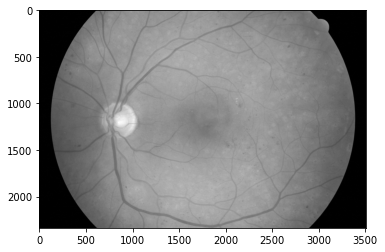

In [7]:
print(img_dataset[0].shape)

plt.imshow(img_dataset[0], cmap=plt.cm.gray)
plt.show()

(2336, 3504)


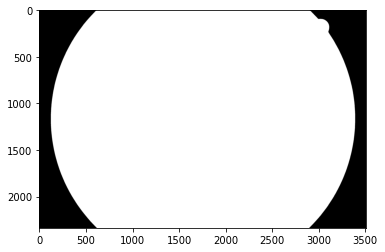

In [8]:
print(mask_dataset[0].shape)

plt.imshow(mask_dataset[0], cmap=plt.cm.gray)
plt.show()

(2336, 3504)


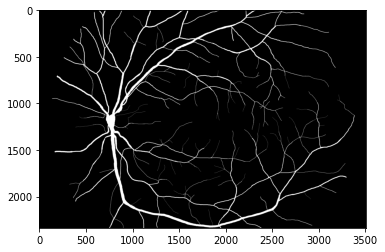

In [9]:
print(manual_dataset[0].shape)

plt.imshow(manual_dataset[0], cmap=plt.cm.gray)
plt.show()

## Frangis

In [10]:
nb_img = 1

In [216]:
frangis = np.array([skimage.filters.frangi(img, sigmas=range(1, 15, 1), alpha=.5, beta=.1, gamma=15) for img in img_dataset[:nb_img]])
print(frangis.shape)

(1, 2336, 3504)


In [217]:
threshold = 1e-7
masked_frangis = np.array([np.where(mask_dataset[i] & (frangis[i] > threshold), 1, 0) for i in range(nb_img)])

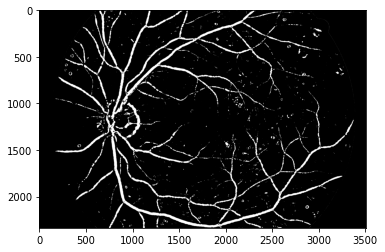

In [218]:
plt.imshow(masked_frangis[0], cmap=plt.cm.gray)
plt.show()

In [219]:
errors = np.array([np.abs(masked_frangis[i] * 255 - manual_dataset[i]) for i in range(nb_img)])
mean_error = np.mean(errors)

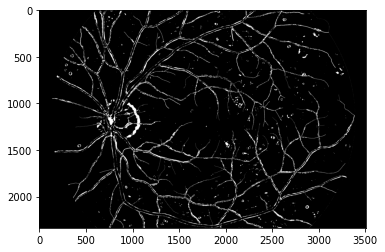

11.730628547804466


In [221]:
plt.imshow(errors[0], cmap=plt.cm.gray)
plt.show()

print(mean_error)